<a href="https://colab.research.google.com/github/sebastian-jarosz/pandas_laboratory/blob/main/Lab4_5_Zad_Dom_Sebastian_Jarosz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###################################################################
# Imports                                                         #
###################################################################
import datetime
import matplotlib.dates as mdates
import matplotlib.lines as lines
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime

In [ ]:
###################################################################
# Collect data from CSV files stored in GITHUB                    #
####################################################################

covid_cases_df = pd.read_csv(
    'https://gist.githubusercontent.com/palles77/ba949ebb6c37bc9039fe56cdf401523d/raw/6b6845898cbdd2c445d4b3e839eba157c798b91a/newyork_covid_cases.csv')
covid_vaccines_df = pd.read_csv(
    'https://gist.githubusercontent.com/palles77/6f37b7df30f10267ed5fb278b9471ab0/raw/3567a37c991e934bb4c705e0cb5e8faa09ce093d/newyork_covid_vaccines.csv')


In [ ]:
###################################################################
# Filtering by week.                                              #
#-----------------------------------------------------------------#
# Arguments:                                                      #
# daily_df - daily data frame                                     #
#-----------------------------------------------------------------#
# Returns:                                                        #
# Weekly data                                                     #
###################################################################
def filter_weekly(daily_df):
    
    result_df = pd.DataFrame(columns=['Week', 'Count'])
    week_day = 0
    week_count = 0
    current_count_per_day_acc = 0
    
    for (_, row) in daily_df.iterrows():

        week_day += 1
        current_count_per_day_acc += row.Count

        if week_day == 6:

            # The end of the week
            new_row = {'Week': week_count,
                       'Count': current_count_per_day_acc}

            # Let's add the data to the result for a finished week.
            result_df = result_df.append(new_row, ignore_index = True)
            current_count_per_day_acc = 0

            week_count += 1
            week_day = 0

    # Deal with the last row, if there is any data left over.
    if week_day != 0:
        new_row = {'Week': week_count,
                   'Count': current_count_per_day_acc}
        result_df = result_df.append(new_row, ignore_index = True)
    
    return result_df

In [ ]:
###################################################################
# Description:                                                    #
# Gunction which filters input data frame by a specific column    #
# which defines amount of data collected in a specific day        #
# This could be number of first doses or first cases.             #
# The function returns a data frame containing summary of the     #
# chosen column for a specific day.                               # 
# One important assumption is that the data provided in           #
# the column is being accumulated over time                       #
#-----------------------------------------------------------------#
# Arguments:                                                      #
# input_data_frame - frame collected from CSV file                #
# name_of_date_column - name of columns with the date in the      #
#                       format for example 12/24/2020 meaning     #
#                       the 24th of December 2020                 #
# name_of_filtering_column - name of column containing aggregated #
#                            count per day                        #
#-----------------------------------------------------------------#
# Returns:                                                        #
# Data frame with two columns 'Day' number of days since the      #
# 1st of January 1970, 'Count' - count of collected day in that   #
# day.                                                            #
###################################################################
# Method fixed
def accumulate_per_day(input_data_frame,
                       name_of_date_column,
                       name_of_filtering_column):

    result_df = pd.DataFrame(columns=['Day', 'Count'])

    # set index to be current datettime
    input_data_frame[name_of_date_column] = pd.to_datetime(
        input_data_frame[name_of_date_column], errors='coerce', format='%m/%d/%Y')

    # Sorting
    input_data_frame = input_data_frame.sort_values(by=name_of_date_column)

    # Group By specific day
    input_data_frame = input_data_frame.groupby(name_of_date_column).sum()

    previous_day_count_acc = 0

    print("Please wait, it may take up to a minute to analyse the data")
    for (index, row) in input_data_frame.iterrows():
        current_day_count_acc = row[name_of_filtering_column]
        current_day = (index - datetime.datetime(1970, 1, 1)).days

        new_row = {'Day': current_day,
                   'Count': current_day_count_acc - previous_day_count_acc}  # Bugfix related change
        result_df = result_df.append(new_row, ignore_index=True)

        # Remember this day's accumulative count as previous day's accumulative count/
        previous_day_count_acc = current_day_count_acc

    return result_df

In [ ]:
###################################################################
# Filter daily_df to weekly_df by collecting the sum of count in  #
# rows from daily_df every 7 days.                                #
###################################################################
covid_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'First Dose')

###################################################################
# Now let's print out the daily summary.                          #
###################################################################
for (index, row) in covid_vaccines_daily_df.iterrows():
    print(f"Current day = {row.Day}, count = {row.Count}")


Please wait, it may take up to a minute to analyse the data
Current day = 18610, count = 202
Current day = 18611, count = 1399
Current day = 18612, count = 4994
Current day = 18613, count = 6087
Current day = 18614, count = 8520
Current day = 18615, count = 4984
Current day = 18616, count = 2391
Current day = 18617, count = 6543
Current day = 18618, count = 12048
Current day = 18619, count = 19142
Current day = 18620, count = 17522
Current day = 18621, count = 3737
Current day = 18622, count = 5400
Current day = 18623, count = 5783
Current day = 18624, count = 16225
Current day = 18625, count = 21624
Current day = 18626, count = 28350
Current day = 18627, count = 28078
Current day = 18628, count = 7742
Current day = 18629, count = 27814
Current day = 18630, count = 7123
Current day = 18631, count = 20392
Current day = 18632, count = 29711
Current day = 18633, count = 44851
Current day = 18634, count = 56687
Current day = 18635, count = 55232
Current day = 18636, count = 25792
Current d

In [ ]:
###################################################################
# Get weekly stats                                                #
###################################################################

weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

###################################################################
# Now let's print out the weekly summary.                         #
###################################################################
for (index_filtered, row_filtered) in weekly_vaccines_df.iterrows():
    print(f"Current week = {row_filtered.Week}, count = {row_filtered.Count}")

Current week = 0, count = 26186
Current week = 1, count = 61383
Current week = 2, count = 105460
Current week = 3, count = 137633
Current week = 4, count = 232538
Current week = 5, count = 292644
Current week = 6, count = 310107
Current week = 7, count = 302886
Current week = 8, count = 214169
Current week = 9, count = 233624
Current week = 10, count = 254003
Current week = 11, count = 189738
Current week = 12, count = 480269
Current week = 13, count = 679453
Current week = 14, count = 659647
Current week = 15, count = 587809
Current week = 16, count = 562737
Current week = 17, count = 535536
Current week = 18, count = 645901
Current week = 19, count = 815743
Current week = 20, count = 576319
Current week = 21, count = 470306
Current week = 22, count = 435715
Current week = 23, count = 287516
Current week = 24, count = 238367
Current week = 25, count = 311664
Current week = 26, count = 382318
Current week = 27, count = 313211
Current week = 28, count = 185220
Current week = 29, count =

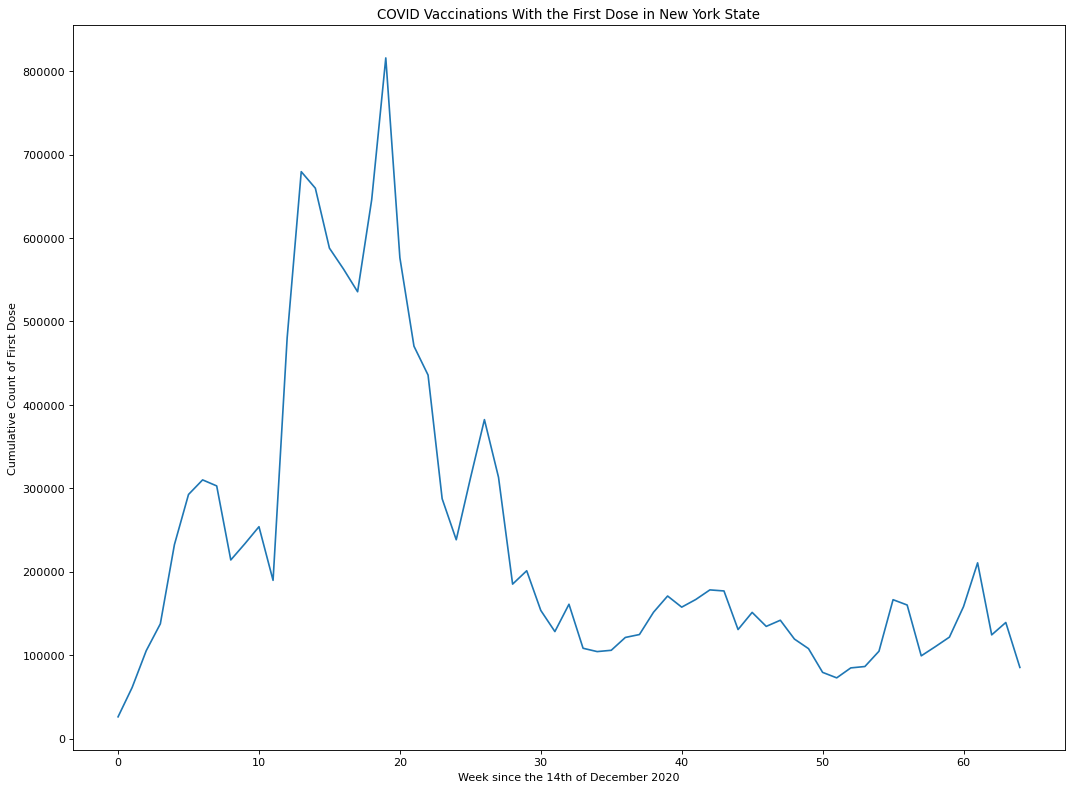

In [ ]:
###################################################################
# Let's display weekly data.                                      #
###################################################################
figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.plot(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the First Dose in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of First Dose')

plt.show()


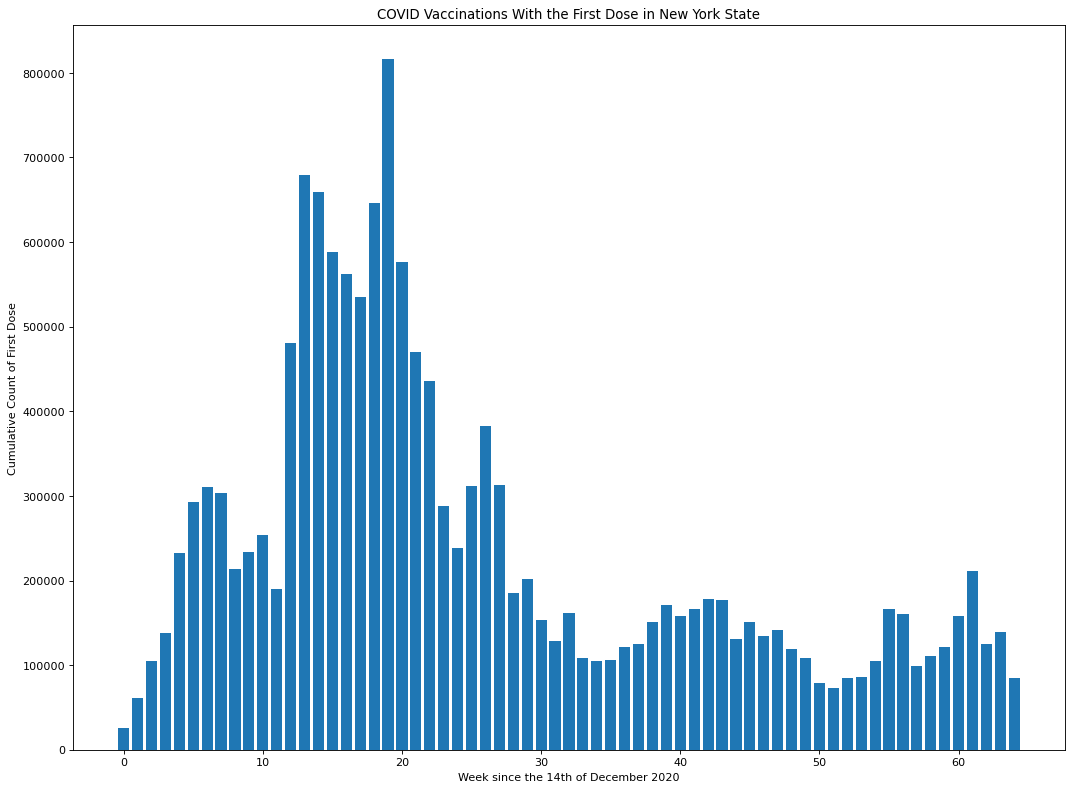

Please wait, it may take up to a minute to analyse the data


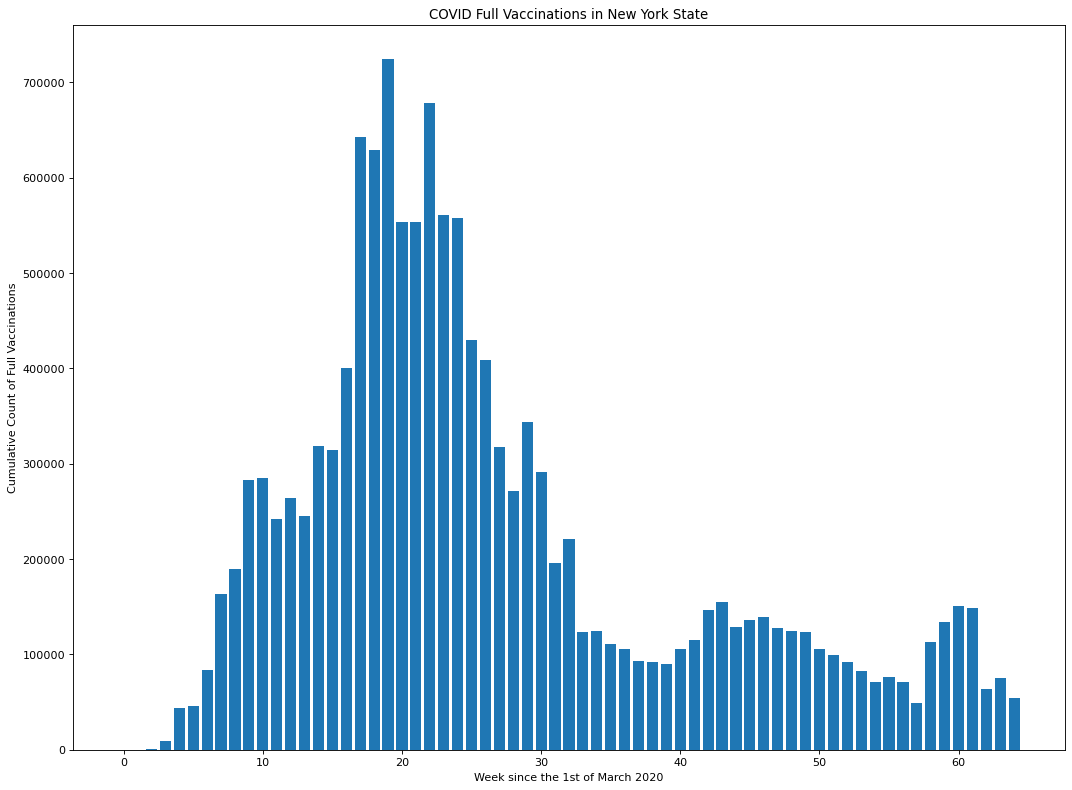

Please wait, it may take up to a minute to analyse the data


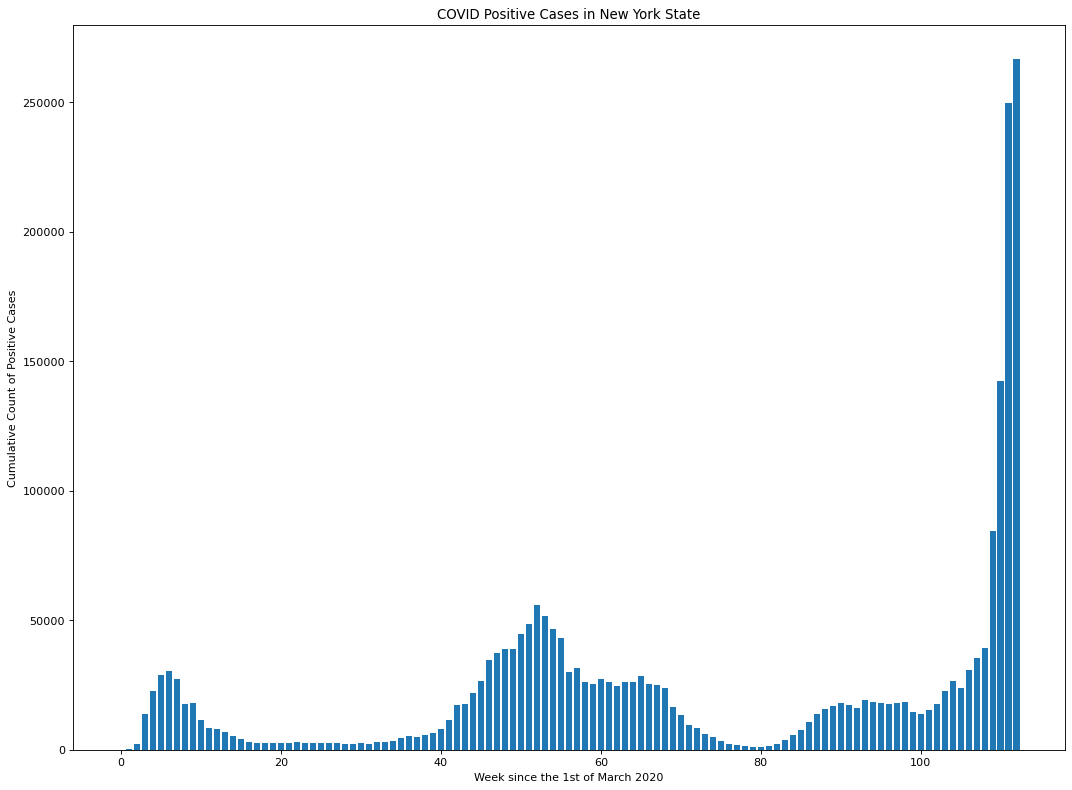

Please wait, it may take up to a minute to analyse the data


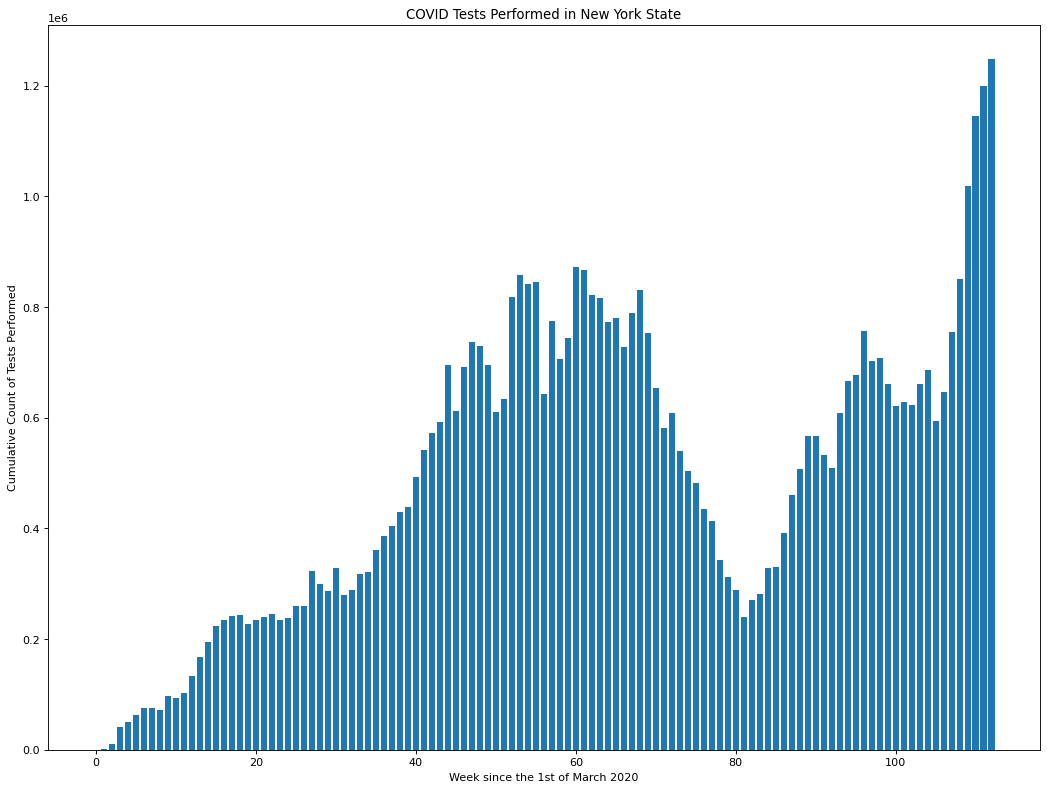

In [ ]:
# # Zadania na 3.0
# # 1. Wyświetlić wykres powyżej jako wykres słupkowy

#Plot size
figure(figsize=(16, 12), dpi=80)

plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the First Dose in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of First Dose')
plt.show()

# # # 2. Wyświetlić ilość pełnych zaszczepień (kolumna 'Series Complete' z covid_vaccines_df) tygodniowo 
# # #    jako wykres słupkowy w ilościach tygodniowych

covid_full_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'Series Complete')
weekly_full_vaccines_df = filter_weekly(covid_full_vaccines_daily_df)

#Plot size
figure(figsize=(16, 12), dpi=80)

plt.bar(weekly_full_vaccines_df['Week'], weekly_full_vaccines_df['Count'])
plt.title('COVID Full Vaccinations in New York State')
plt.xlabel('Week since the 1st of March 2020')
plt.ylabel('Cumulative Count of Full Vaccinations')
plt.show()


# # # 3. Wyświetlić ilość nowych pozytywnych przypadków (kolumna 'Cumulative Number of Positives' z covid_cases_df)
# # #    jako wykres słupkowy w ilościach tygodniowych
# third_task_df = covid_cases_df

covid_number_of_positives_daily_df = accumulate_per_day(covid_cases_df, 'Test Date', 'Cumulative Number of Positives')
weekly_number_of_positives_df = filter_weekly(covid_number_of_positives_daily_df)

figure(figsize=(16, 12), dpi=80)

plt.bar(weekly_number_of_positives_df['Week'], weekly_number_of_positives_df['Count'])
plt.title('COVID Positive Cases in New York State')
plt.xlabel('Week since the 1st of March 2020')
plt.ylabel('Cumulative Count of Positive Cases')
plt.show()


# # # 4. Wyświetlić ilość testów (kolumna 'Cumulative Number of Tests Performed' z covid_cases_df)
# # #    jako wykres słupkowy w ilościach tygodniowych

covid_number_of_tests_daily_df = accumulate_per_day(covid_cases_df, 'Test Date', 'Cumulative Number of Tests Performed')
weekly_number_of_tests_df = filter_weekly(covid_number_of_tests_daily_df)

figure(figsize=(16, 12), dpi=80)

plt.bar(weekly_number_of_tests_df['Week'], weekly_number_of_tests_df['Count'])
plt.title('COVID Tests Performed in New York State')
plt.xlabel('Week since the 1st of March 2020')
plt.ylabel('Cumulative Count of Tests Performed')

plt.show()

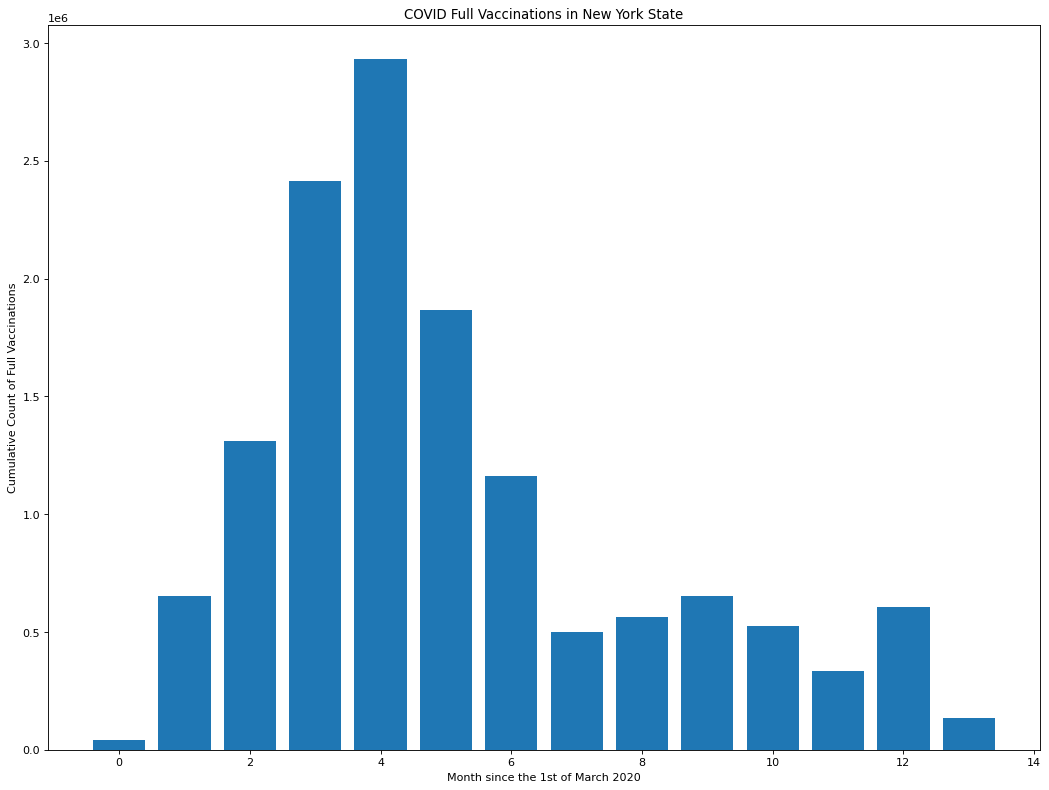

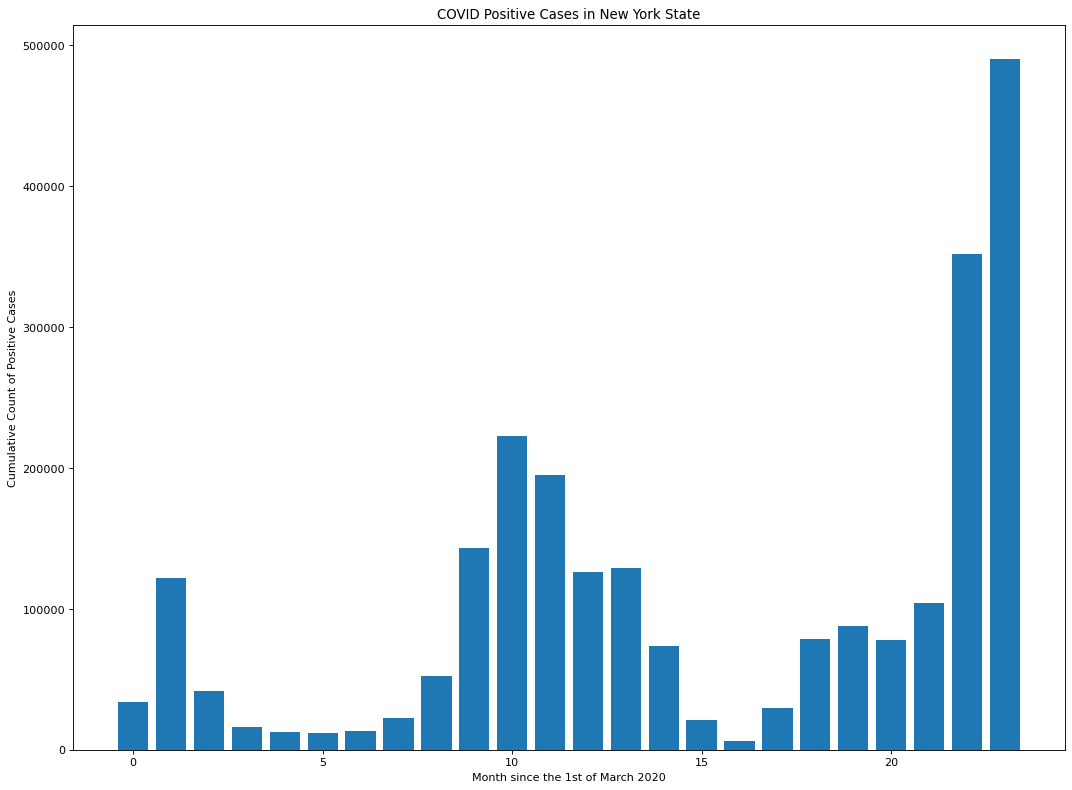

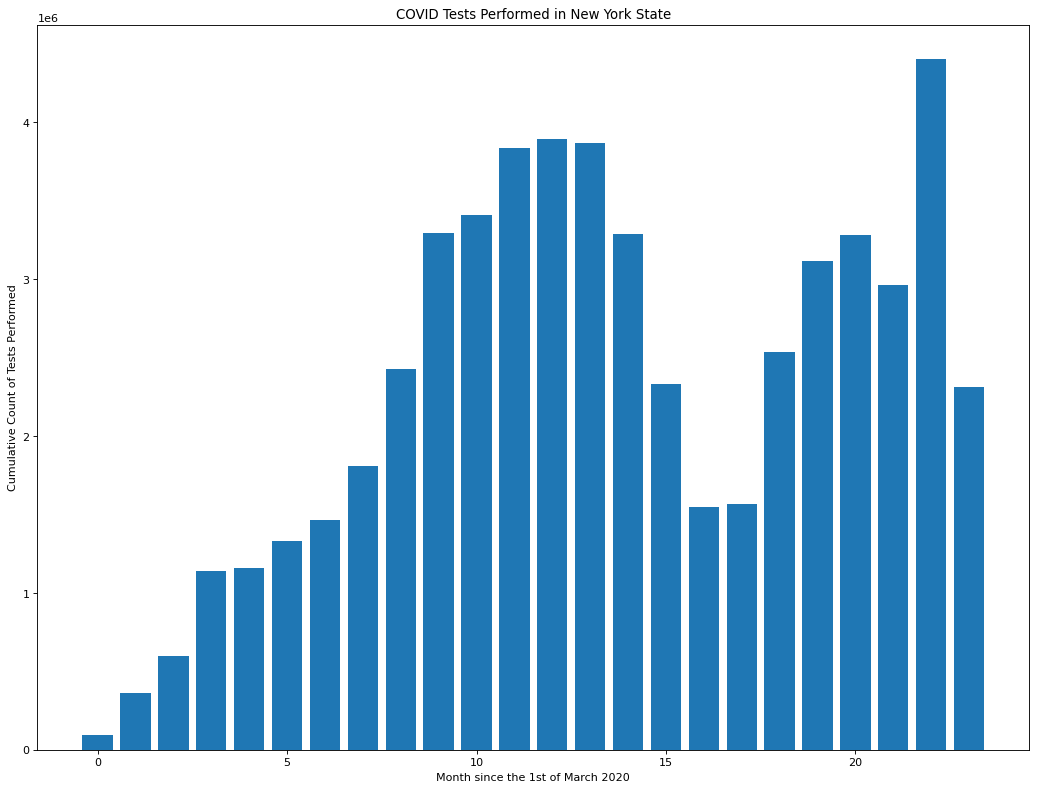

In [ ]:
# Zadania na 3.5
# 1. Wykonać wszystkie zadania na 3
# 2. Dodać nową funkcję monthly, która będzie filtrować dane dzienne co 30 dni.

###################################################################
# Filtering by month (30 days).                                   #
#-----------------------------------------------------------------#
# Arguments:                                                      #
# daily_df - daily data frame                                     #
#-----------------------------------------------------------------#
# Returns:                                                        #
# Monthly data                                                    #
###################################################################
def filter_monthly(daily_df):
    
    result_df = pd.DataFrame(columns=['Month', 'Count'])
    month_day = 0
    month_count = 0
    current_count_per_day_acc = 0
    
    for (_, row) in daily_df.iterrows():

        month_day += 1
        current_count_per_day_acc += row.Count

        if month_day == 29:

            # The end of the month
            new_row = {'Month': month_count,
                       'Count': current_count_per_day_acc}

            # Let's add the data to the result for a finished month.
            result_df = result_df.append(new_row, ignore_index = True)
            current_count_per_day_acc = 0

            month_count += 1
            month_day = 0

    # Deal with the last row, if there is any data left over.
    if month_day != 0:
        new_row = {'Month': month_count,
                   'Count': current_count_per_day_acc}
        result_df = result_df.append(new_row, ignore_index = True)
    
    return result_df

# 3. Wyświetlić ilość pełnych zaszczepień (kolumna 'Series Complete' z covid_vaccines_df)
#    jako wykres słupkowy w ilościach miesięcznych.

monthly_full_vaccines_df = filter_monthly(covid_full_vaccines_daily_df)

#Plot size
figure(figsize=(16, 12), dpi=80)

plt.bar(monthly_full_vaccines_df['Month'], monthly_full_vaccines_df['Count'])
plt.title('COVID Full Vaccinations in New York State')
plt.xlabel('Month since the 1st of March 2020')
plt.ylabel('Cumulative Count of Full Vaccinations')
plt.show()

# 4. Wyświetlić ilość nowych pozytywnych przypadków (kolumna 'Cumulative Number of Positives' z covid_cases_df)
#    jako wykres słupkowy w ilościach miesięcznych.

monthly_number_of_positives_df = filter_monthly(covid_number_of_positives_daily_df)

figure(figsize=(16, 12), dpi=80)

plt.bar(monthly_number_of_positives_df['Month'], monthly_number_of_positives_df['Count'])
plt.title('COVID Positive Cases in New York State')
plt.xlabel('Month since the 1st of March 2020')
plt.ylabel('Cumulative Count of Positive Cases')
plt.show()

# 5. Wyświetlić ilość testów (kolumna 'Cumulative Number of Tests Performed' z covid_cases_df)
#    jako wykres słupkowy w ilościach miesięcznych.

monthly_number_of_tests_df = filter_monthly(covid_number_of_tests_daily_df)

figure(figsize=(16, 12), dpi=80)

plt.bar(monthly_number_of_tests_df['Month'], monthly_number_of_tests_df['Count'])
plt.title('COVID Tests Performed in New York State')
plt.xlabel('Month since the 1st of March 2020')
plt.ylabel('Cumulative Count of Tests Performed')

plt.show()



Please wait, it may take up to a minute to analyse the data


Text(0, 0.5, 'Cumulative Count of Reported Cases')

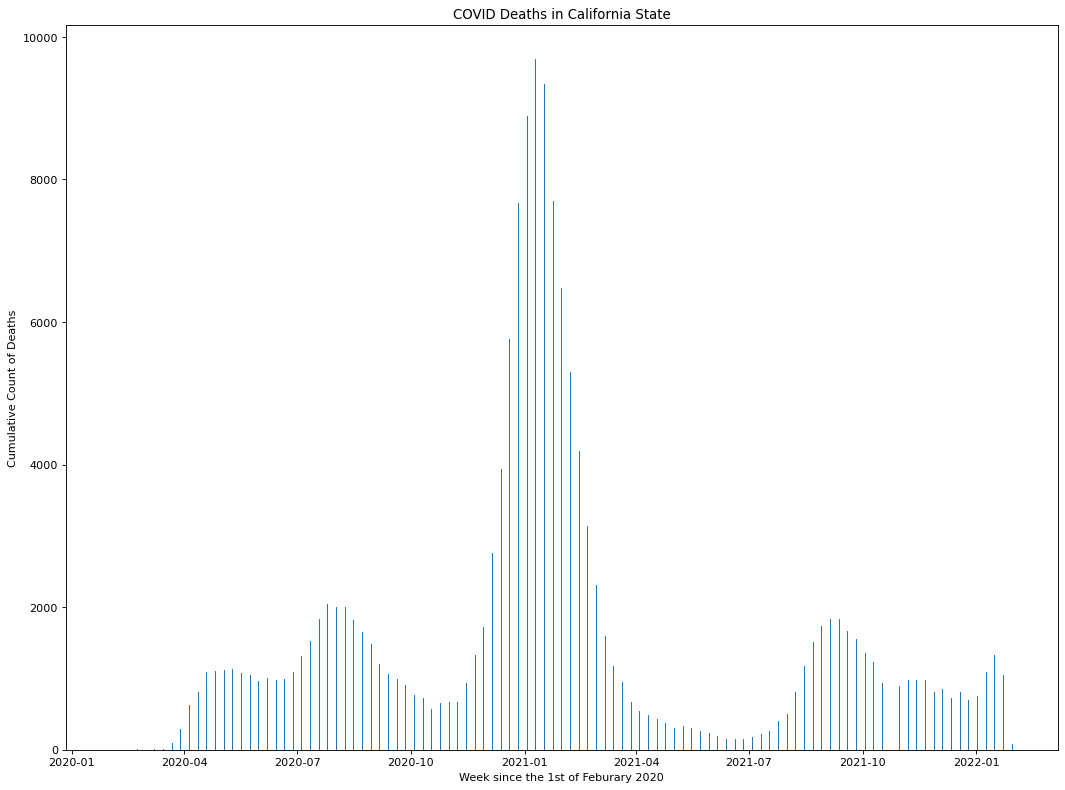

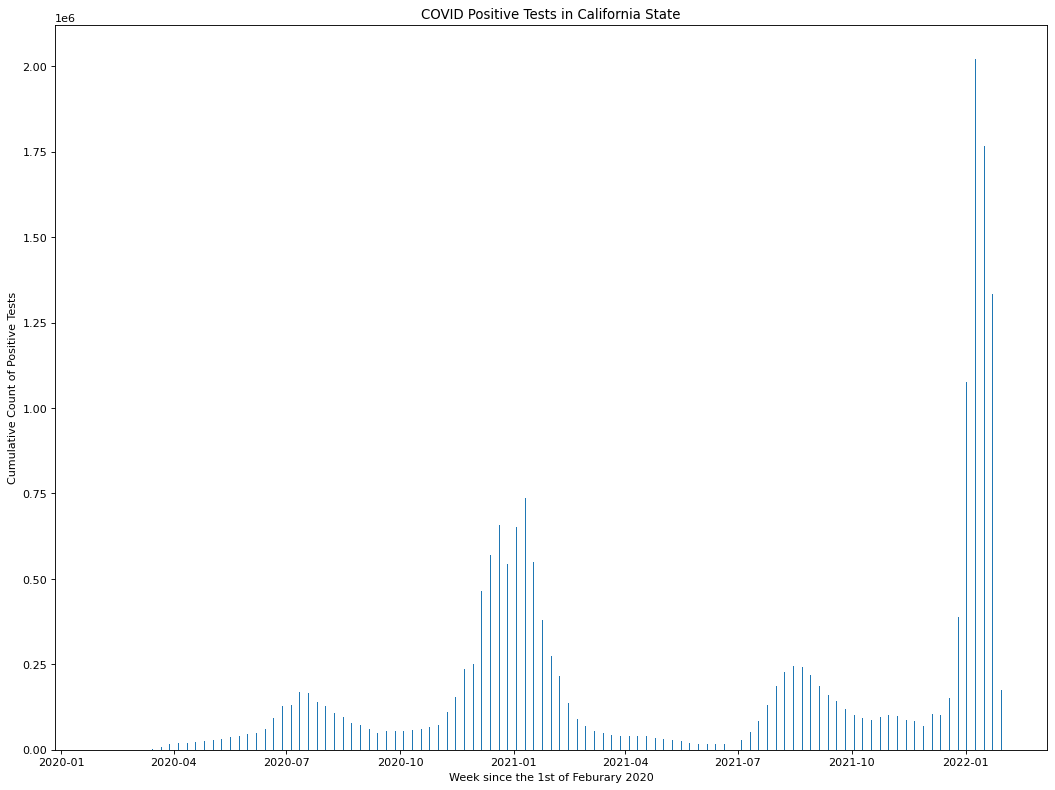

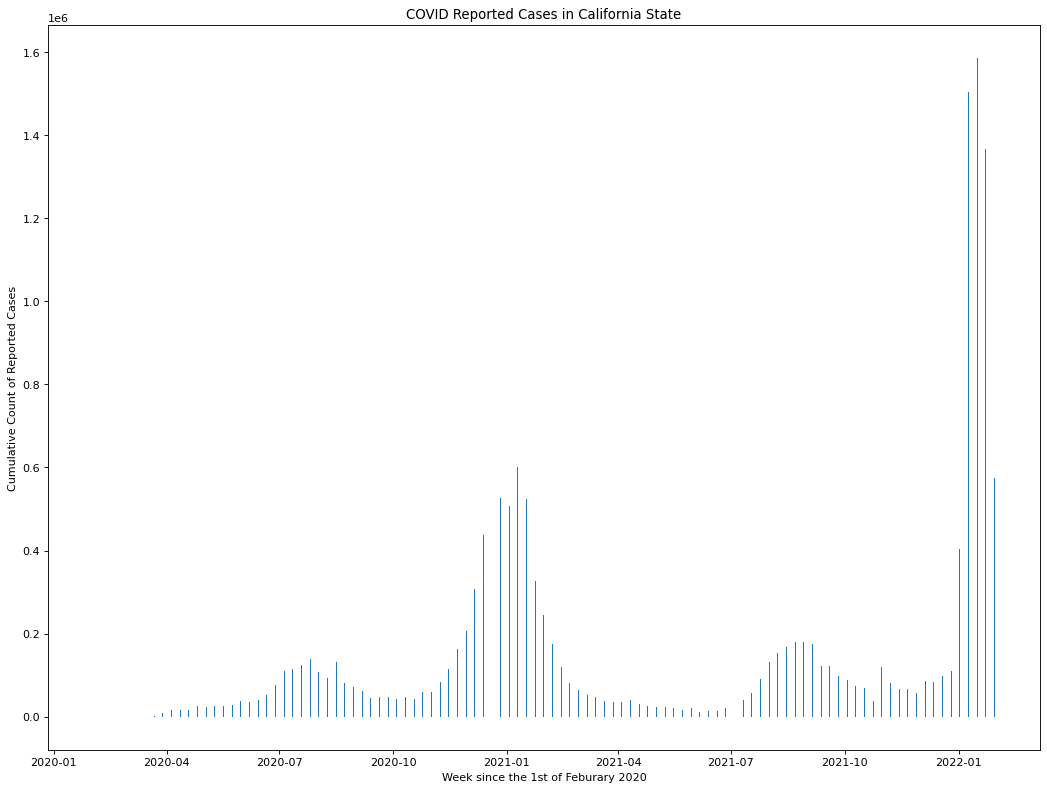

In [ ]:
# Zadania na 4.0 dla stanu California

california_df = pd.read_csv('https://gist.githubusercontent.com/palles77/33af6db4c1c9f0354814e18484e1707a/raw/ec403188428c5adcc597723157c99892d2d8014e/california_tests') 

# 1. Wykonać wszystkie zadania na 3.5
# 2. Dodać nową funkcję california_daily_df, która będzie działać dla kolmumn 'cumulative_cases', 'cumuluative_deaths',
#    'cumulative_total_tests', 'cumulative_positive_tests', 'cumulative_reported_cases'

# Default values provided
def california_daily_df(input_data_frame,
                        name_of_date_column='date', requested_columns=['cumulative_cases',
                                                                       'cumulative_deaths',
                                                                       'cumulative_total_tests',
                                                                       'cumulative_positive_tests',
                                                                       'cumulative_reported_cases']):
    # set index to be current datettime
    input_data_frame[name_of_date_column] = pd.to_datetime(
        input_data_frame[name_of_date_column], errors='coerce', format='%Y-%m-%d')

    # Sorting
    input_data_frame = input_data_frame.sort_values(by=name_of_date_column)

    # Group By specific day
    input_data_frame = input_data_frame.groupby(name_of_date_column).sum()

    # Result df will contain Day and requested_columns
    result_df = pd.DataFrame(columns=['Day'] + requested_columns)

    current_day_dict = {}
    previous_day_dict = {}

    # For the first iteration init previous_day_dict with 0
    for column in requested_columns:
        previous_day_dict[column] = 0

    print("Please wait, it may take up to a minute to analyse the data")
    for (index, row) in input_data_frame.iterrows():
        # Value of current day
        current_day = index

        # Add day to current_day_dict
        current_day_dict['Day'] = current_day

        # Add current day data subtracted by previous day data to current_day_dict
        for column in requested_columns:
            current_day_dict[column] = (row[column] - previous_day_dict[column])
            
            # Data for previous day cannot be subtracted, since we need to subtract in next iteration
            # two cumulative values (row, previous_row)
            previous_day_dict[column] = row[column]

        result_df = result_df.append(current_day_dict, ignore_index=True)

    return result_df
        

california_daily_result_df = california_daily_df(california_df)


# 3. Wyświetlić dane tygodniowe dla: ilości zgonów, ilości wykonanych pozytywnych testów, ilości pozytywnych przypadków.
#    Należy pamiętać, że dane w tych kolumnach podobnie jak w przypadku danych dla Nowego Jorku są podawane w sposób
#    akumulacyjny i sposób ich obliczania powinien być taki sam jak dla Nowego Jorku.

california_weekly_result_df = california_daily_result_df.groupby(pd.Grouper(freq='W', key='Day')).sum()

# ilości zgonów
figure(figsize=(16, 12), dpi=80)
plt.bar(california_weekly_result_df.index, california_weekly_result_df['cumulative_deaths'])
plt.title('COVID Deaths in California State')
plt.xlabel('Week since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Deaths')

# ilości wykonanych pozytywnych testów 
figure(figsize=(16, 12), dpi=80)
plt.bar(california_weekly_result_df.index, california_weekly_result_df['cumulative_positive_tests'])
plt.title('COVID Positive Tests in California State')
plt.xlabel('Week since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Positive Tests')

# ilości pozytywnych przypadków
figure(figsize=(16, 12), dpi=80)
plt.bar(california_weekly_result_df.index, california_weekly_result_df['cumulative_reported_cases'])
plt.title('COVID Reported Cases in California State')
plt.xlabel('Week since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Reported Cases')

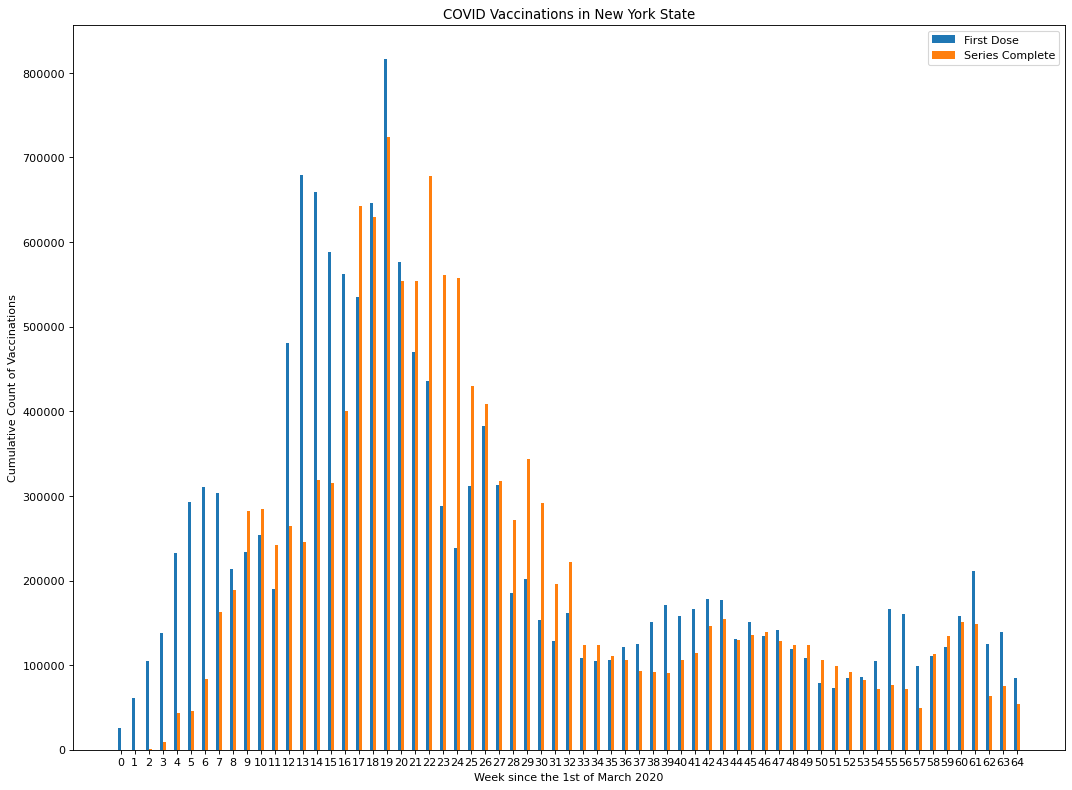

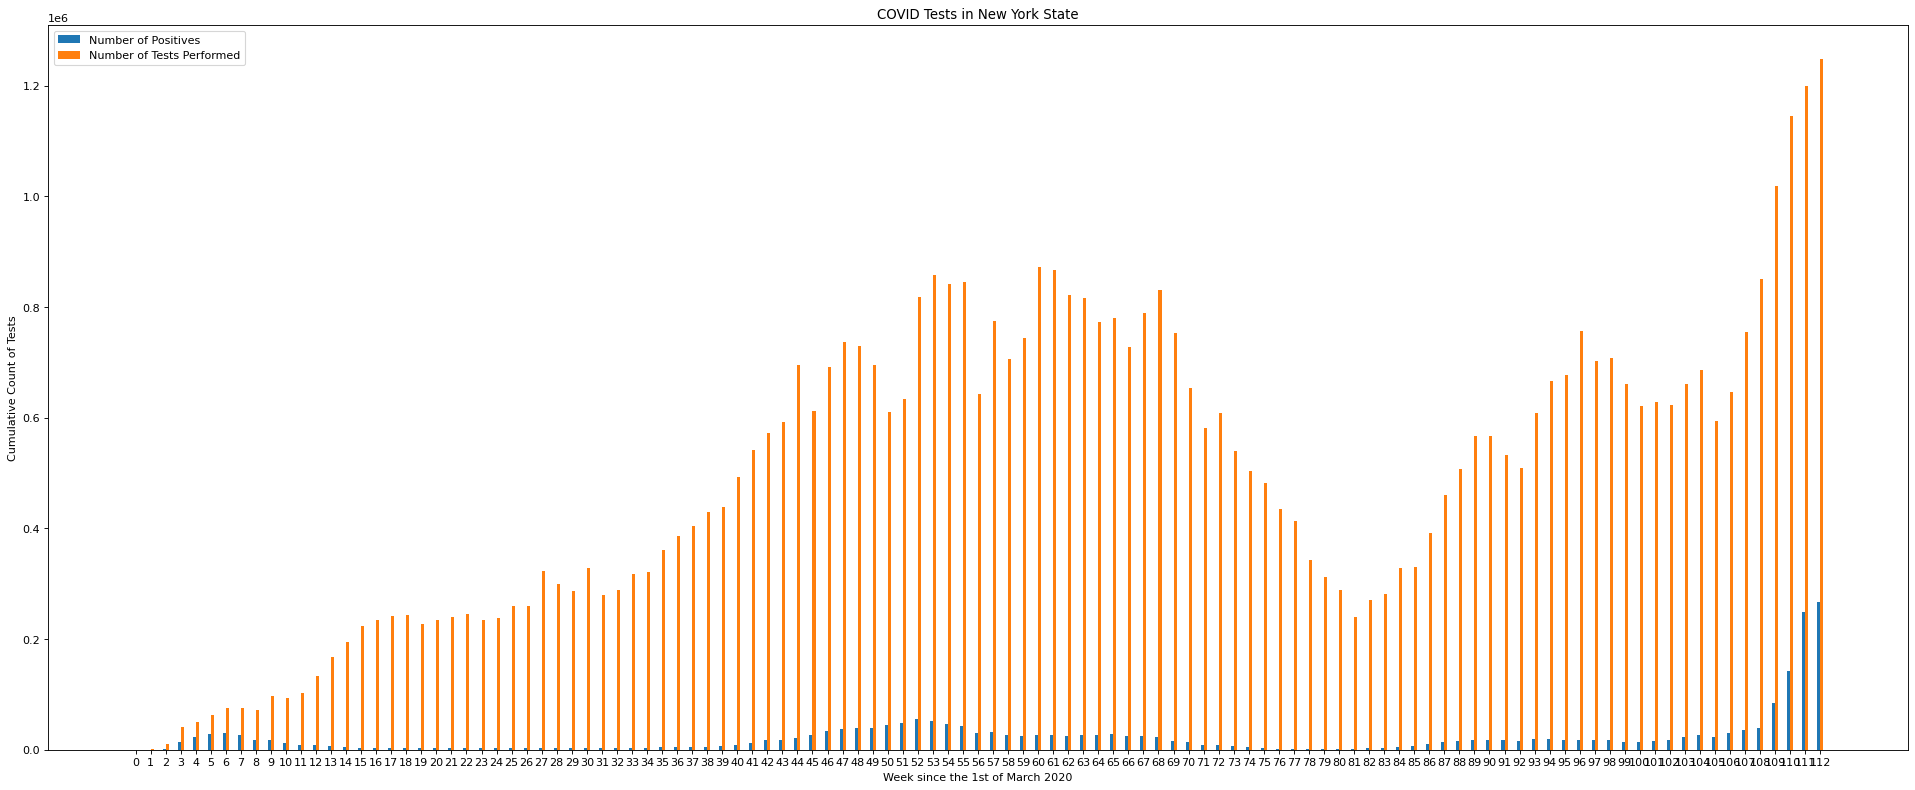

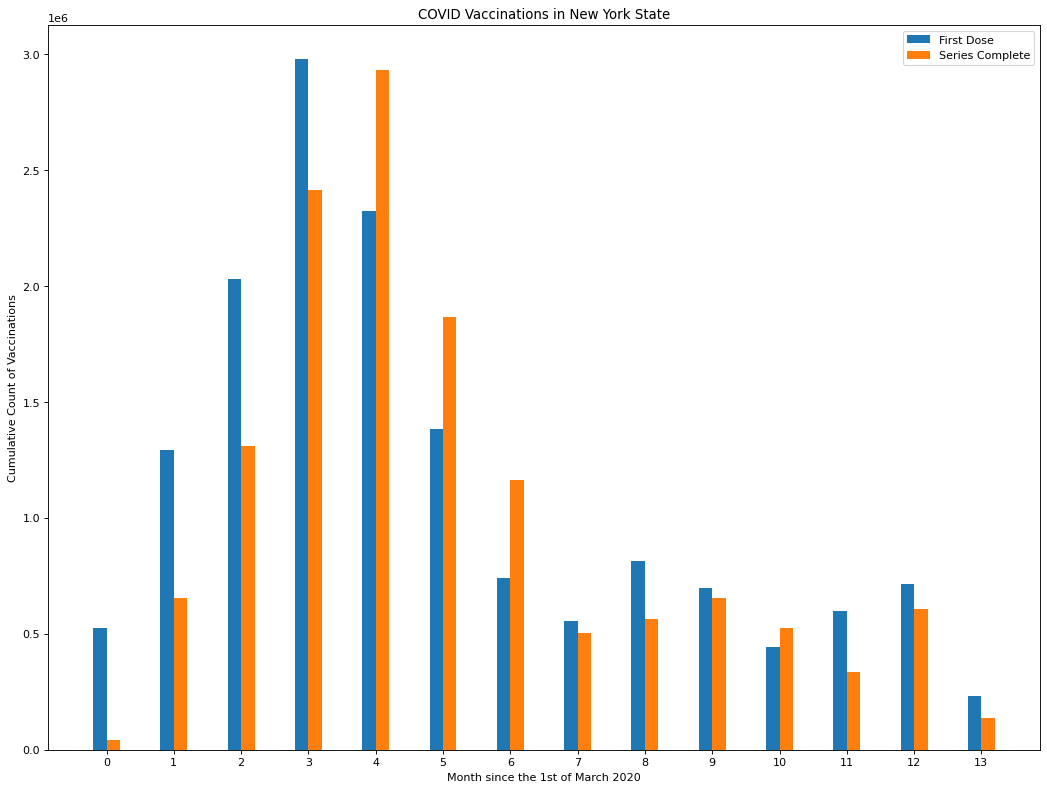

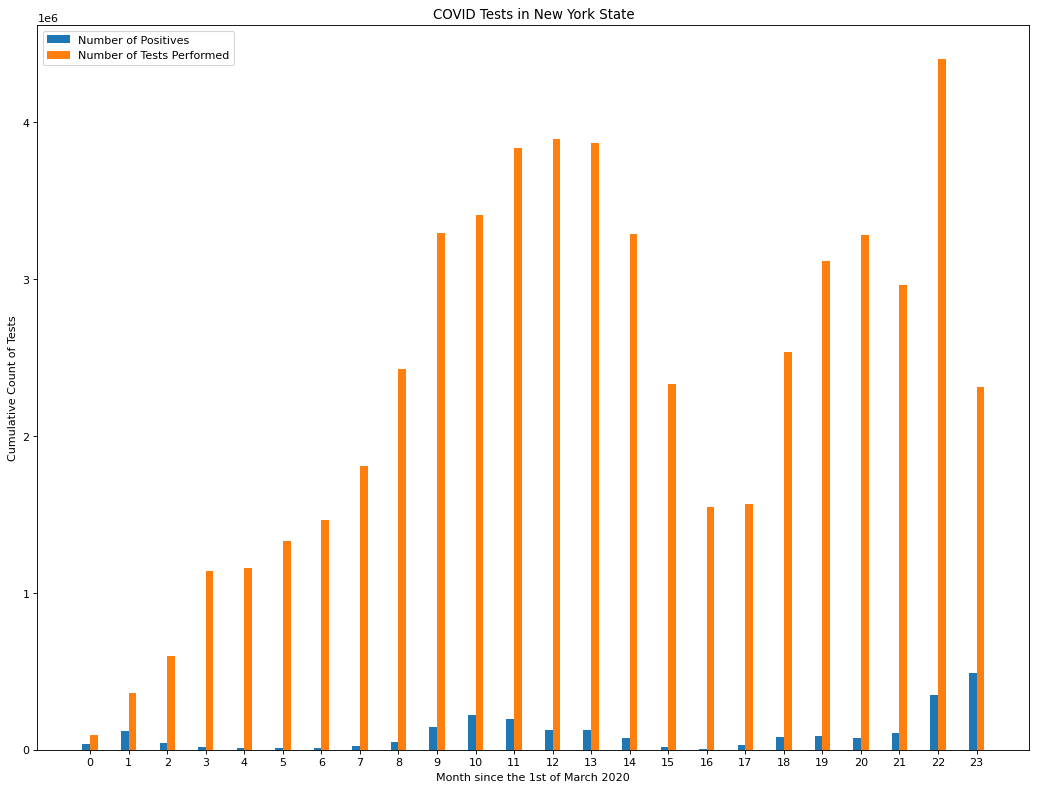

In [ ]:
# Zadania na 4.5
# 1. Wykonać zadania na 4
# 2. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'Series Complete', 'First Dose' 
#    w cyklach tygodniowych

#Plot size
figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(weekly_full_vaccines_df['Week']))
  
plt.bar(X_axis - 0.1, weekly_vaccines_df['Count'], 0.2, label = 'First Dose')
plt.bar(X_axis + 0.1, weekly_full_vaccines_df['Count'], 0.2, label = 'Series Complete')
  
plt.xticks(X_axis, weekly_full_vaccines_df['Week'])
plt.title('COVID Vaccinations in New York State')
plt.xlabel('Week since the 1st of March 2020')
plt.ylabel('Cumulative Count of Vaccinations')
plt.legend()
plt.show()

# 3. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'Cumulative Number of Positives', 
#    'Cumulative Number of Positives' w cyklach tygodniowych

# Domyślam się że wkradł się tutaj błąd - w zadaniu zamiast dwukrotnego użycia 'Cumulative Number of Positives'
# użyję kolumn 'Cumulative Number of Positives' oraz 'Cumulative Number of Tests Performed'

#Plot size
figure(figsize=(30, 12), dpi=80)

X_axis = np.arange(len(weekly_number_of_positives_df['Week']))
  
plt.bar(X_axis - 0.1, weekly_number_of_positives_df['Count'], 0.2, label = 'Number of Positives')
plt.bar(X_axis + 0.1, weekly_number_of_tests_df['Count'], 0.2, label = 'Number of Tests Performed')
  
plt.xticks(X_axis, weekly_number_of_positives_df['Week'])
plt.title('COVID Tests in New York State')
plt.xlabel('Week since the 1st of March 2020')
plt.ylabel('Cumulative Count of Tests')
plt.legend()
plt.show()


# 4. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'Series Complete', 'First Dose' 
#    w cyklach 30 dniowych

monthly_vaccines_df = filter_monthly(covid_vaccines_daily_df)

#Plot size
figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(monthly_vaccines_df['Month']))
  
plt.bar(X_axis - 0.1, monthly_vaccines_df['Count'], 0.2, label = 'First Dose')
plt.bar(X_axis + 0.1, monthly_full_vaccines_df['Count'], 0.2, label = 'Series Complete')
  
plt.xticks(X_axis, monthly_vaccines_df['Month'])
plt.title('COVID Vaccinations in New York State')
plt.xlabel('Month since the 1st of March 2020')
plt.ylabel('Cumulative Count of Vaccinations')
plt.legend()
plt.show()


# 5. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'Cumulative Number of Positives', 
#    'Cumulative Number of Positives' w cyklach 30 dniowych

# Domyślam się że wkradł się tutaj błąd - w zadaniu zamiast dwukrotnego użycia 'Cumulative Number of Positives'
# użyję kolumn 'Cumulative Number of Positives' oraz 'Cumulative Number of Tests Performed'
#Plot size
figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(monthly_number_of_positives_df['Month']))
  
plt.bar(X_axis - 0.1, monthly_number_of_positives_df['Count'], 0.2, label = 'Number of Positives')
plt.bar(X_axis + 0.1, monthly_number_of_tests_df['Count'], 0.2, label = 'Number of Tests Performed')
  
plt.xticks(X_axis, monthly_number_of_positives_df['Month'])
plt.title('COVID Tests in New York State')
plt.xlabel('Month since the 1st of March 2020')
plt.ylabel('Cumulative Count of Tests')
plt.legend()
plt.show()

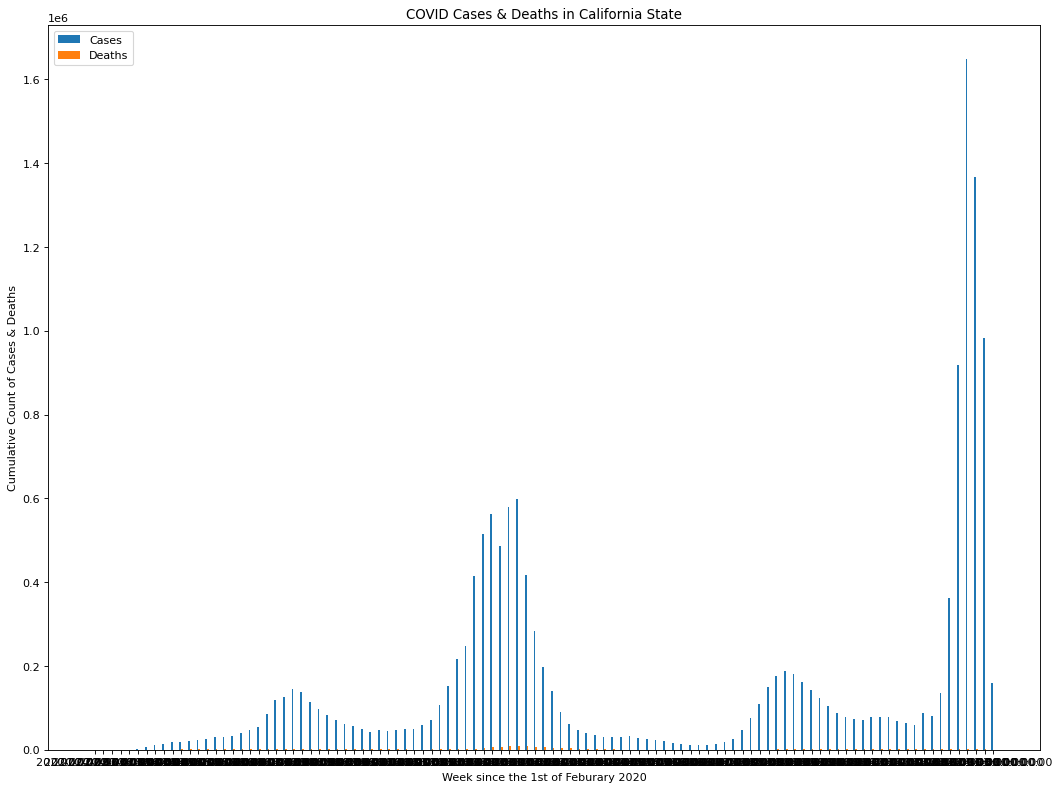

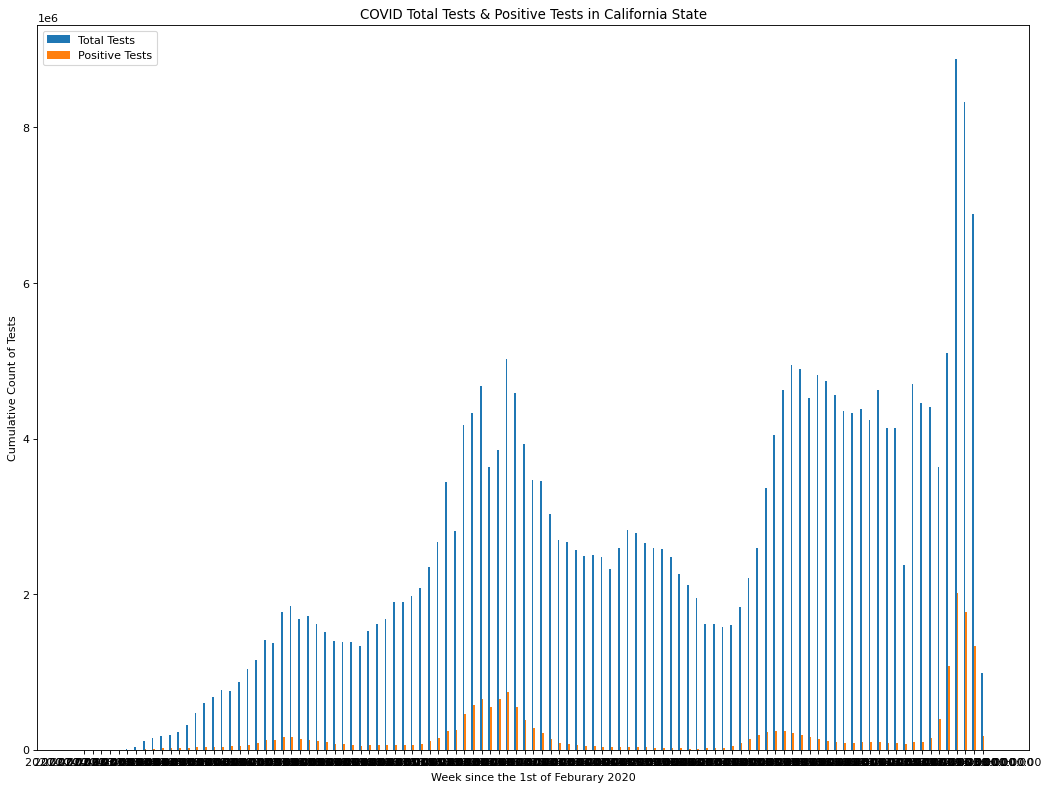

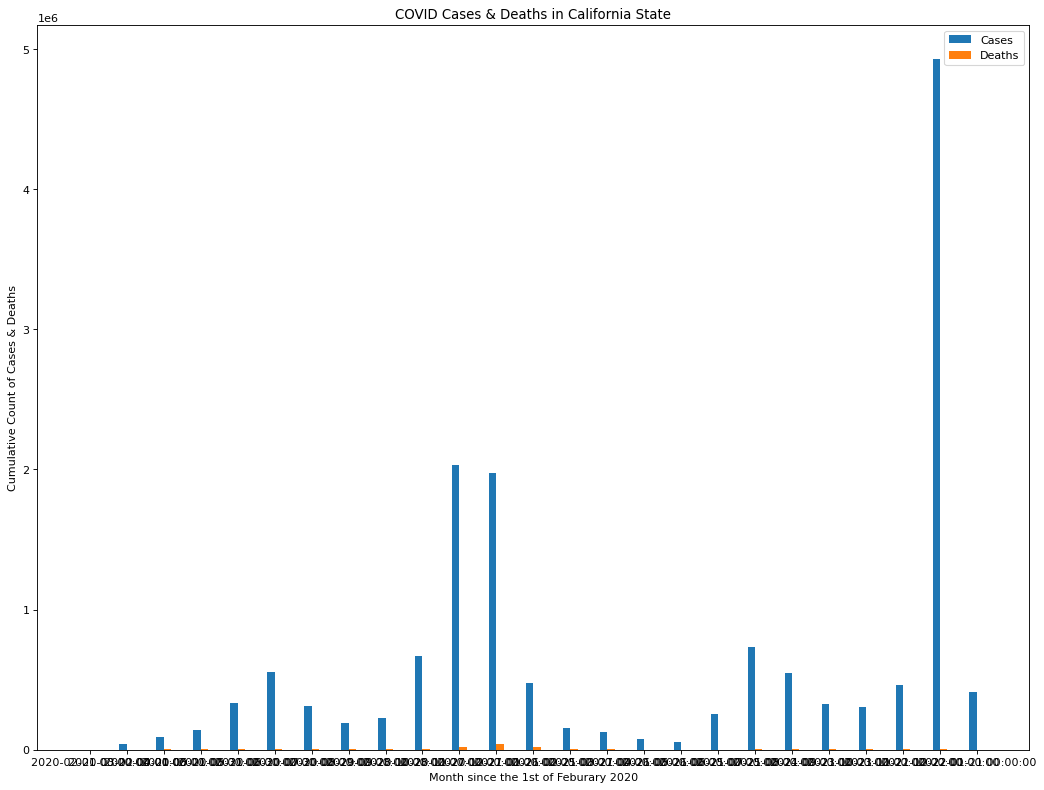

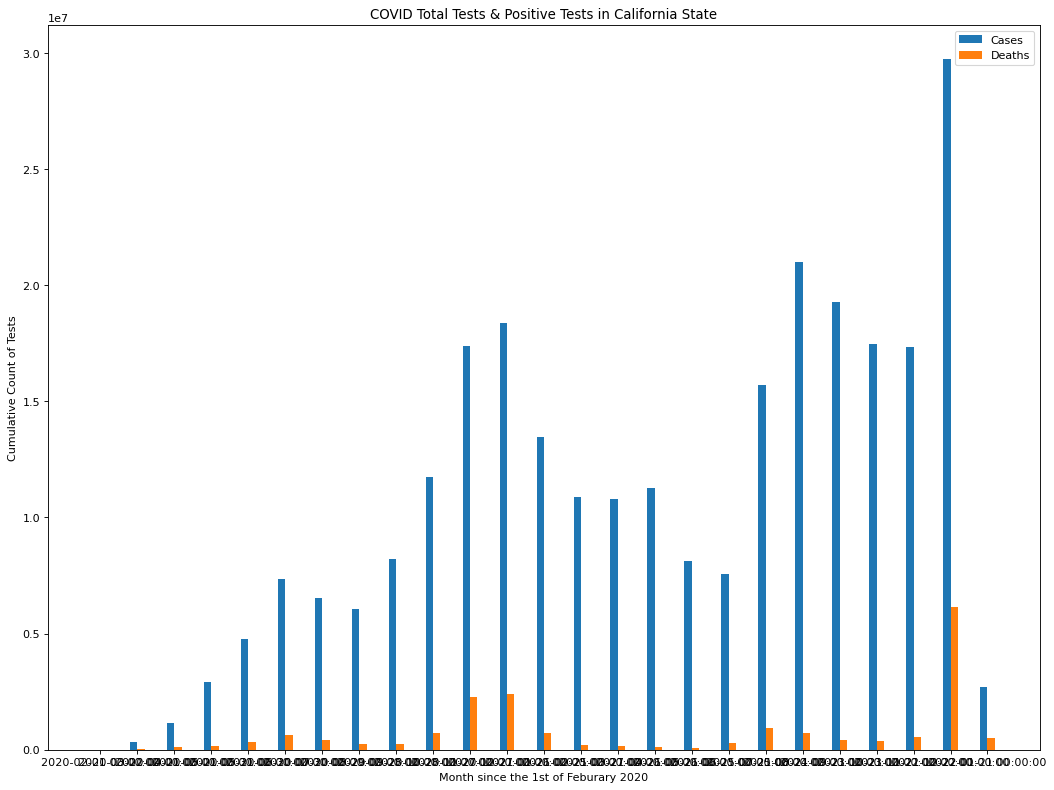

In [ ]:
# Zadania na 5.0
# 1. Wykonać zadania na 4.5

# Ze względu na brak wymienionych kolumn w zestawieniu dla Nowego Jorku, zostały użyte dane z Kalifornii

# 2. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'cumulative_cases', 'cumuluative_deaths' 
#    w cyklach tygodniowych

california_weekly_result_df = california_daily_result_df.groupby(pd.Grouper(freq='W', key='Day')).sum()

figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(california_weekly_result_df.index))
  
plt.bar(X_axis - 0.1, california_weekly_result_df['cumulative_cases'], 0.2, label = 'Cases')
plt.bar(X_axis + 0.1, california_weekly_result_df['cumulative_deaths'], 0.2, label = 'Deaths')
  
plt.xticks(X_axis, california_weekly_result_df.index)
plt.title('COVID Cases & Deaths in California State')
plt.xlabel('Week since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Cases & Deaths')
plt.legend()
plt.show()

# 3. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'cumulative_total_tests', 
#    'cumulative_positive_tests' w cyklach tygodniowych

figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(california_weekly_result_df.index))
  
plt.bar(X_axis - 0.1, california_weekly_result_df['cumulative_total_tests'], 0.2, label = 'Total Tests')
plt.bar(X_axis + 0.1, california_weekly_result_df['cumulative_positive_tests'], 0.2, label = 'Positive Tests')
  
plt.xticks(X_axis, california_weekly_result_df.index)
plt.title('COVID Total Tests & Positive Tests in California State')
plt.xlabel('Week since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Tests')
plt.legend()
plt.show()

# 4. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny kolumny 'cumulative_total_tests', 
#    'cumulative_positive_tests' w cyklach 30 dniowych

california_monthly_result_df = california_daily_result_df.groupby(pd.Grouper(freq='30D', key='Day')).sum()

figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(california_monthly_result_df.index))
  
plt.bar(X_axis - 0.1, california_monthly_result_df['cumulative_cases'], 0.2, label = 'Cases')
plt.bar(X_axis + 0.1, california_monthly_result_df['cumulative_deaths'], 0.2, label = 'Deaths')
  
plt.xticks(X_axis, california_monthly_result_df.index)
plt.title('COVID Cases & Deaths in California State')
plt.xlabel('Month since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Cases & Deaths')
plt.legend()
plt.show()

# 5. Pokazać wykresy dla Nowego Jorku zestawione tak, aby koło siebie były kolumny 'cumulative_total_tests', 
#    'cumulative_positive_tests' w cyklach 30 dniowych

california_monthly_result_df = california_daily_result_df.groupby(pd.Grouper(freq='30D', key='Day')).sum()

figure(figsize=(16, 12), dpi=80)

X_axis = np.arange(len(california_monthly_result_df.index))
  
plt.bar(X_axis - 0.1, california_monthly_result_df['cumulative_total_tests'], 0.2, label = 'Cases')
plt.bar(X_axis + 0.1, california_monthly_result_df['cumulative_positive_tests'], 0.2, label = 'Deaths')
  
plt.xticks(X_axis, california_monthly_result_df.index)
plt.title('COVID Total Tests & Positive Tests in California State')
plt.xlabel('Month since the 1st of Feburary 2020')
plt.ylabel('Cumulative Count of Tests')
plt.legend()
plt.show()

